<a href="https://colab.research.google.com/github/RafaelYano/Aula_DataScience/blob/main/alula4machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fonte =  "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

In [9]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO","NU_NOTA_TOTAL"]
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_NaN = dados_sem_notas_zero[provas].dropna()

In [10]:
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC","NU_NOTA_CN" ,"NU_NOTA_REDACAO"]
provas_saida = "NU_NOTA_MT"
notas_entrada = dados_sem_notas_NaN[provas_entrada]
notas_saida = dados_sem_notas_NaN[provas_saida]

In [11]:
x = notas_entrada
y = notas_saida

In [12]:
from sklearn.model_selection import train_test_split
SEED = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.25, random_state = SEED)

In [13]:
x_teste.shape

(23135, 4)

In [14]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [15]:
predicoes_MT = modelo.predict(x_teste)

In [16]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

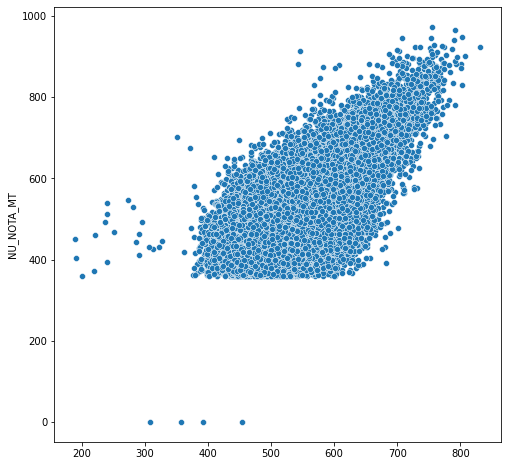

In [17]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=predicoes_MT, y = y_teste)



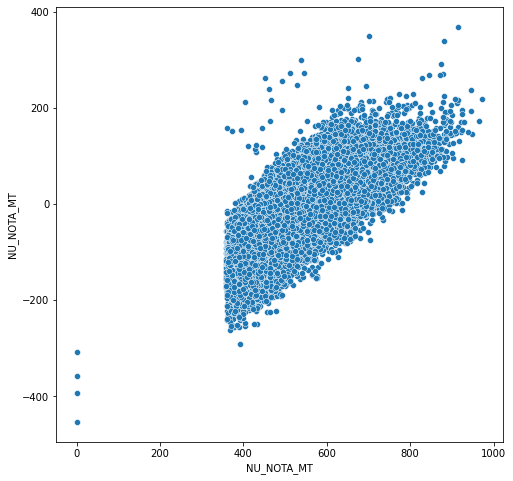

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_teste, y = y_teste-predicoes_MT)

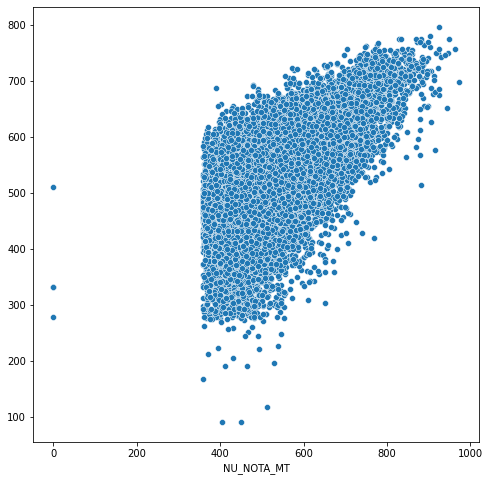

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_teste, y = x_teste.mean(axis=1))

In [120]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"]= predicoes_MT
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2


In [21]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [22]:
resultados["quadrado_diferenca"].mean()**(1/2)

81.26755383435341

In [23]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes) #12063.645588509502

12063.645588509502

In [24]:
mean_squared_error(y_teste, predicoes_MT)#6604.41530621957

6604.41530621957

**Desafio1 = procurar outro modelo de ML para treinar e comparar com os modelos criados em aula**

In [30]:
#desafio 1 com decision tree
from sklearn import tree
modelo_tree = tree.DecisionTreeRegressor()
modelo_tree.fit(x_treino, y_treino)
tree_predicoes = modelo_tree.predict(x_teste)
mean_squared_error(y_teste, tree_predicoes) #11365.011590231252


11365.011590231252

In [122]:
resultadosdt = pd.DataFrame()
resultadosdt["Real"] = y_teste
resultadosdt["Previsao"]= tree_predicoes
resultadosdt["diferenca"] = resultadosdt["Real"] - resultadosdt["Previsao"]
resultadosdt["quadrado_diferenca"] = (resultadosdt["Real"] - resultadosdt["Previsao"])**2
resultadosdt

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,655.9,-196.2,38494.44
104685,617.2,664.6,-47.4,2246.76
91028,520.0,448.3,71.7,5140.89
115802,703.8,553.2,150.6,22680.36
93303,627.1,509.5,117.6,13829.76
...,...,...,...,...
81393,688.6,544.0,144.6,20909.16
40159,479.1,633.4,-154.3,23808.49
64083,501.4,660.0,-158.6,25153.96
84661,772.5,816.3,-43.8,1918.44


In [37]:
#desafio 1 com near neighbors
from sklearn.neighbors import KNeighborsRegressor
modelo_neigh = KNeighborsRegressor()
modelo_neigh.fit(x_treino, y_treino)
neigh_predicoes = modelo_neigh.predict(x_teste)
mean_squared_error(y_teste, neigh_predicoes) #6432.6058905554355

6432.6058905554355

In [123]:
resultadosnn = pd.DataFrame()
resultadosnn["Real"] = y_teste
resultadosnn["Previsao"]= neigh_predicoes
resultadosnn["diferenca"] = resultadosdt["Real"] - resultadosdt["Previsao"]
resultadosnn["quadrado_diferenca"] = (resultadosdt["Real"] - resultadosdt["Previsao"])**2
resultadosnn

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,465.70,-196.2,38494.44
104685,617.2,621.74,-47.4,2246.76
91028,520.0,495.72,71.7,5140.89
115802,703.8,506.04,150.6,22680.36
93303,627.1,521.90,117.6,13829.76
...,...,...,...,...
81393,688.6,554.86,144.6,20909.16
40159,479.1,651.82,-154.3,23808.49
64083,501.4,604.88,-158.6,25153.96
84661,772.5,797.60,-43.8,1918.44


Text(0.5, 0.98, 'Comparando os modelos')

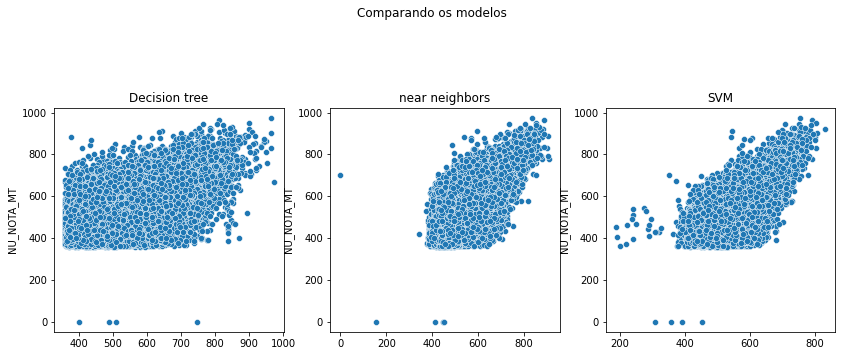

In [124]:
plt.figure(figsize=(14,14))
plt.subplot(3,3,1)
#arvore de decisoes
sns.scatterplot(x=tree_predicoes, y = y_teste)
plt.title("Decision tree")
#SVM
plt.subplot(3,3,3)
sns.scatterplot(x= predicoes_MT, y = y_teste)
plt.title("SVM")
#near neighbors
plt.subplot(3,3,2)
sns.scatterplot(x= neigh_predicoes, y = y_teste)
plt.title("near neighbors")

plt.suptitle("Comparando os modelos")

**Desafio2: Ler a documentacao do Dummy e alterar o metodo de regressao**

In [40]:
#desafio 2, dummy strategy = mean
modelo_dummy_mean = DummyRegressor(strategy="mean")
modelo_dummy_mean.fit(x_treino, y_treino)
dummy_predicoes_mean = modelo_dummy_mean.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes_mean) #12063.645588509502

12063.645588509502

In [42]:
#desafio 2, dummy strategy =median
modelo_dummy_median = DummyRegressor(strategy="median")
modelo_dummy_median.fit(x_treino, y_treino)
dummy_predicoes_median = modelo_dummy_median.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes_median) #12599.969971795981

12599.969971795981

In [56]:
#desafio 2, dummy strategy =quantile - 1(maximo)
modelo_dummy_quantile = DummyRegressor(strategy="quantile", quantile = 1.0)
modelo_dummy_quantile.fit(x_treino, y_treino)
dummy_predicoes_quantile = modelo_dummy_quantile.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes_quantile ) #223890.15624378645

223890.15624378645

In [59]:
#desafio 2, dummy strategy =quantile - 0(minimo)
modelo_dummy_quantile_m = DummyRegressor(strategy="quantile", quantile = 0.0)
modelo_dummy_quantile_m.fit(x_treino, y_treino)
dummy_predicoes_quantile_m = modelo_dummy_quantile_m.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes_quantile_m ) #287425.98995893664

287425.98995893664

Text(0.5, 0.98, 'Comparando os metodos')

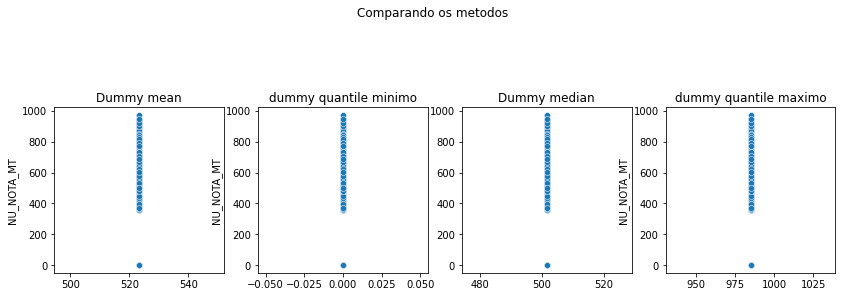

In [65]:
plt.figure(figsize=(14,14))
plt.subplot(4,4,1)
#mean
sns.scatterplot(x=dummy_predicoes_mean, y = y_teste)
plt.title("Dummy mean")
#median
plt.subplot(4,4,3)
sns.scatterplot(x= dummy_predicoes_median, y = y_teste)
plt.title("Dummy median")
#minimo
plt.subplot(4,4,2)
sns.scatterplot(x= dummy_predicoes_quantile_m, y = y_teste)
plt.title("dummy quantile minimo")

#maximo
plt.subplot(4,4,4)
sns.scatterplot(x= dummy_predicoes_quantile, y = y_teste)
plt.title("dummy quantile maximo")


plt.suptitle("Comparando os metodos")

**Desafio3: Busacar outra métrcia(mean squared root) para avaliar modelos de regressão**

In [134]:
import sklearn.metrics  as skm
#Metricas para o SVM
m1 = skm.mean_absolute_error(y_teste, predicoes_MT )
m2 = mean_squared_error(y_teste, predicoes_MT)
m3 = skm.max_error(y_teste, predicoes_MT)
m4 = skm.median_absolute_error(y_teste, predicoes_MT )

#metricas Near neighbors
nn1 = skm.mean_absolute_error(y_teste, neigh_predicoes )
nn2 = mean_squared_error(y_teste, neigh_predicoes )
nn3 = skm.max_error(y_teste, neigh_predicoes )
nn4 = skm.median_absolute_error(y_teste, neigh_predicoes )

#metricas Decision tree
dt1 = skm.mean_absolute_error(y_teste, tree_predicoes )
dt2 = mean_squared_error(y_teste, tree_predicoes )
dt3 = skm.max_error(y_teste, tree_predicoes )
dt4 = skm.median_absolute_error(y_teste, tree_predicoes ) 

#metricas dummy
du1 = skm.mean_absolute_error(y_teste, dummy_predicoes )
du2 = mean_squared_error(y_teste,  dummy_predicoes )
du3 = skm.max_error(y_teste,  dummy_predicoes )
du4 = skm.median_absolute_error(y_teste,  dummy_predicoes )

metri = {"modelos":["SVM", "Near Neighbors", "Decision Tree", "Dummy"],"mean_absolute_error":[m1, nn1, dt1, du1]," mean_squared_error":[m2,nn2,dt2,du2], "max_error":[m3,nn3,dt3, du3], "median_absolute_error":[m4, nn4, dt4, du4]}
modelos_regressao = pd.DataFrame(data = metri)
modelos_regressao


,modelos,mean_absolute_error,mean_squared_error,max_error,median_absolute_error
0,SVM,66.045554,6604.415306,453.506823,57.918485
1,Near Neighbors,63.782104,6432.605891,701.600000,53.660000
2,Decision Tree,83.813910,11365.011590,747.000000,68.500000
3,Dummy,90.387175,12063.645589,523.339552,82.960448
